In [66]:
 #This example uses Python 2.7 and the python-request library.

from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '9fcaece2-d553-43d3-8f1d-64efbe6801eb',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2025-03-08T00:45:12.782Z', 'error_code': 0, 'error_message': None, 'elapsed': 27, 'credit_count': 1, 'notice': None, 'total_count': 10779}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 11971, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'par

In [67]:
type(data)

dict

In [68]:
import pandas as pd

#This allows you to see all the columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [69]:
#This normalizes the data and makes it all pretty in a dataframe
df = pd.json_normalize(data['data'])
df['timestamp']=pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11971,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19833737.00000,19833737.00000,False,NaN,1,NaN,NaN,None,2025-03-08T00:43:00.000Z,86693.93940,61795308545.72977,18.66620,0.18364,0.87717,3.18261,-10.46311,-15.16906,-13.26470,1719464793621.12109,60.41130,1820572727471.56006,None,2025-03-08T00:43:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-03-07 18:45:14.111566
1,1027,Ethereum,ETH,ethereum,9963,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120597393.23725,120597393.23725,True,NaN,2,NaN,NaN,None,2025-03-08T00:43:00.000Z,2142.19644,20640223075.17919,13.39550,0.38510,0.76312,-3.70658,-22.76496,-41.84298,-46.52286,258343306112.40656,9.06990,258343306112.41000,None,2025-03-08T00:43:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-03-07 18:45:14.111566
2,825,Tether USDt,USDT,tether,118686,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, ethereum...",NaN,142799794449.01764,144556334099.41824,True,NaN,3,NaN,NaN,None,2025-03-08T00:43:00.000Z,0.99960,102928072346.26152,17.87470,-0.00906,-0.04735,0.01013,-0.03826,-0.09035,-0.12707,142742616451.70901,5.01140,144498452771.82999,None,2025-03-08T00:43:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-03-07 18:45:14.111566
3,52,XRP,XRP,xrp,1546,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",100000000000.00000,58043299826.00000,99986368206.00000,False,NaN,4,NaN,NaN,None,2025-03-08T00:43:00.000Z,2.39069,8845811393.37513,13.93240,0.87259,-2.40076,11.97710,-0.64589,-1.00888,-7.55720,138763367236.75684,4.87170,239068708451.67999,None,2025-03-08T00:43:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-03-07 18:45:14.111566
4,1839,BNB,BNB,bnb,2382,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,142475535.45000,142475535.45000,False,NaN,5,NaN,NaN,None,2025-03-08T00:43:00.000Z,595.09510,1801858316.42902,8.80260,0.54336,2.04143,1.17059,3.97552,-18.50542,-20.81702,84786492991.80759,2.97670,84786492991.81000,None,2025-03-08T00:43:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-03-07 18:45:14.111566
5,5426,Solana,SOL,solana,848,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,508776796.12911,595586407.03047,True,NaN,6,NaN,NaN,None,2025-03-08T00:43:00.000Z,139.94164,5638171252.31127,22.46760,0.84967,2.23012,-4.63468,-29.31180,-35.91141,-41.48118,71199059062.17209,2.49960,83347338348.39999,None,2025-03-08T00:43:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-03-07 18:45:14.111566
6,3408,USDC,USDC,usd-coin,26090,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,58142146082.03819,58142146082.03819,False,NaN,7,NaN,NaN,None,2025-03-08T00:43:00.000Z,0.99991,10970768620.45519,9.22000,-0.00969,-0.01633,0.00701,-0.00531,-0.01524,-0.00813,58136863219.08050,2.04060,58136863219.08000,None,2025-03-08T00:43:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-03-07 18:45:14.111566
7,74,Dogecoin,DOGE,dogecoin,1174,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,148335966383.70526,148335966383.70526,True,NaN,8,NaN,NaN,None,2025-03-08T00:43:00.000Z,0.19886,1660679750.33436,-14.87640,0.72182,2.49296,-0.72976,-22.79119,-48.99013,-56.33140,29497513416.47502,1.03640,29497513416.48000,None,2025-03-08T00:43:

In [70]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
        'start':'1',
        'limit':'15',
        'convert':'USD'
    }
    headers = {
        'Accepts': 'application/json',
        'X-CMC_PRO_API_KEY': '9fcaece2-d553-43d3-8f1d-64efbe6801eb',
    }

    session = Session()
    session.headers.update(headers)

    try:
        response = session.get(url, params=parameters)
        data = json.loads(response.text)
        #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
        print(e)
    
    
    df = pd.json_normalize(data['data'])
    df['timestamp']=pd.to_datetime('now')
    df 
    

    if not os.path.isfile(r'C:\Users\olade\OneDrive - Prairie View A&M University\Desktop\MySQL\Alex Tutorials\API\api.csv'):
        df.to_csv(r'C:\Users\olade\OneDrive - Prairie View A&M University\Desktop\MySQL\Alex Tutorials\API\api.csv', header = 'column_names')
    else:
        df.to_csv(r'C:\Users\olade\OneDrive - Prairie View A&M University\Desktop\MySQL\Alex Tutorials\API\api.csv',mode = 'a', header = False)


In [71]:
import os
from time import time
from time import sleep


for i in range(333):
    api_runner()
    print('API runner completed successfully')
    sleep(60) #sleep for 1 minute
exit()

API runner completed successfully
API runner completed successfully
API runner completed successfully
API runner completed successfully
API runner completed successfully
API runner completed successfully
API runner completed successfully
API runner completed successfully
API runner completed successfully
API runner completed successfully
API runner completed successfully
API runner completed successfully
API runner completed successfully
API runner completed successfully


KeyboardInterrupt: 

In [72]:
df72 = pd.read_csv(r'C:\Users\olade\OneDrive - Prairie View A&M University\Desktop\MySQL\Alex Tutorials\API\api.csv')
df72

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0.00000,1,Bitcoin,BTC,bitcoin,11971,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.0,19833668.0,19833668.0,False,NaN,1,NaN,NaN,NaN,2025-03-07T23:34:00.000Z,86539.91191358928,66819102597.64541,37.6632,0.52065117,-4.4073877,2.86079738,-10.16815551,-15.22820575,-13.65983977,1716403881643.3745,60.4547,1817338150185.37,NaN,2025-03-07T23:34:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-03-07 17:36:06.738639
1,1.00000,1027,Ethereum,ETH,ethereum,9963,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120597393.23725124,120597393.23725124,True,NaN,2,NaN,NaN,NaN,2025-03-07T23:35:00.000Z,2135.404541528221,22677195360.56683,14.6584,0.21366727,-3.38460791,-4.11545324,-22.83553285,-41.98790066,-46.80258293,257524221215.29108,9.0704,257524221215.29,NaN,2025-03-07T23:35:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-03-07 17:36:06.738639
2,2.00000,825,Tether USDt,USDT,tether,118686,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'eth...",NaN,142799794449.01764,144556334099.41824,True,NaN,3,NaN,NaN,NaN,2025-03-07T23:34:00.000Z,0.9996448670659613,111319507154.85666,27.0636,-0.01113584,-0.03821347,0.02842646,-0.01177836,-0.08816304,-0.11990367,142749081539.03485,5.0279,144504997384.36,NaN,2025-03-07T23:34:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-03-07 17:36:06.738639
3,3.00000,52,XRP,XRP,xrp,1546,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.0,58043299826.0,99986368206.0,False,NaN,4,NaN,NaN,NaN,2025-03-07T23:35:00.000Z,2.368298525725871,9755256897.21766,41.4047,-0.29886783,-9.10334908,10.65324789,-0.09364444,-2.00448503,-7.95262746,137463861406.1805,4.8417,236829852572.59,NaN,2025-03-07T23:35:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-03-07 17:36:06.738639
4,4.00000,1839,BNB,BNB,bnb,2382,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,142475537.95,142475537.95,False,NaN,5,NaN,NaN,NaN,2025-03-07T23:35:00.000Z,592.3352292858555,1862484706.2302487,14.3315,-0.08116184,-0.90479446,1.04508732,4.45365541,-18.97338278,-21.30432112,84393280439.23885,2.9713,84393280439.24,NaN,2025-03-07T23:35:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-03-07 17:36:06.738639
5,5.00000,5426,Solana,SOL,solana,848,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,508705425.3731251,595586467.2737329,True,NaN,6,NaN,NaN,NaN,2025-03-07T23:35:00.000Z,138.40324209763673,6064993903.522098,44.1454,-1.9588047,-4.0921842,-6.20878652,-29.22850065,-36.54754174,-42.32329966,70406480144.29791,2.4798,82431098020.16,NaN,2025-03-07T23:35:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-03-07 17:36:06.738639
6,6.00000,3408,USDC,USDC,usd-coin,26090,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,58140239390.45835,58140239390.45835,False,NaN,7,NaN,NaN,NaN,2025-03-07T23:34:00.000Z,0.9998949786677169,12670957934.29963,23.7104,-0.00844591,-0.0102709,0.01154766,0.02032408,-0.02094037,0.00076272,58134133425.05831,2.0469,58134133425.06,NaN,2025-03-07T23:34:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-03-07 17:36:06.738639
7,7.00000,74,Dogecoin,DOGE,dogecoin,1174,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,148335086383.70526,148335086383.70526,True,NaN,8,NaN,

In [ ]:

pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [ ]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11971,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19833703.00000,19833703.00000,False,NaN,1,NaN,NaN,None,2025-03-07T23:42:00.000Z,86502.54986,66801337758.50347,38.05090,-0.09526,-4.32583,2.56315,-10.41987,-15.32319,-13.51207,1715665882697.87500,60.47560,1816553547093.82007,None,2025-03-07T23:42:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-03-07 17:44:45.527669
1,1027,Ethereum,ETH,ethereum,9963,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120597393.23725,120597393.23725,True,NaN,2,NaN,NaN,None,2025-03-07T23:43:00.000Z,2133.97843,22857397218.80547,18.60590,-0.67640,-3.33048,-4.45126,-23.40229,-42.07306,-46.76786,257352235468.18854,9.06750,257352235468.19000,None,2025-03-07T23:43:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-03-07 17:44:45.527669
2,825,Tether USDt,USDT,tether,118686,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, ethereum...",NaN,142799794449.01764,144556334099.41824,True,NaN,3,NaN,NaN,None,2025-03-07T23:42:00.000Z,0.99958,111414603150.55122,27.05050,-0.00598,-0.04567,0.01548,-0.04093,-0.09464,-0.12363,142739746258.68335,5.02930,144495547273.38000,None,2025-03-07T23:42:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-03-07 17:44:45.527669
3,52,XRP,XRP,xrp,1546,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",100000000000.00000,58043299826.00000,99986368206.00000,False,NaN,4,NaN,NaN,None,2025-03-07T23:43:00.000Z,2.37001,9771842609.87300,41.49750,-0.80903,-9.11580,10.52122,-0.65027,-1.92002,-8.50496,137563002583.91504,4.84690,237000658122.98001,None,2025-03-07T23:43:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-03-07 17:44:45.527669
4,1839,BNB,BNB,bnb,2382,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,142475537.23000,142475537.23000,False,NaN,5,NaN,NaN,None,2025-03-07T23:43:00.000Z,591.87907,1863853836.99823,14.36820,-0.49763,-0.93493,0.89407,4.05658,-18.98612,-21.35278,84328289147.42624,2.97040,84328289147.42999,None,2025-03-07T23:43:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-03-07 17:44:45.527669
5,5426,Solana,SOL,solana,848,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,508705405.47872,595586447.38363,True,NaN,6,NaN,NaN,None,2025-03-07T23:43:00.000Z,138.76262,6078889636.73631,44.53650,-2.31124,-3.68914,-6.22669,-29.32446,-36.44626,-42.11917,70589295287.36346,2.48710,82645136361.28999,None,2025-03-07T23:43:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-03-07 17:44:45.527669
6,3408,USDC,USDC,usd-coin,26090,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,58143436487.55711,58143436487.55711,False,NaN,7,NaN,NaN,None,2025-03-07T23:43:00.000Z,1.00001,12617951571.87908,27.44160,0.01524,-0.00650,0.01886,0.00521,-0.01599,-0.00039,58143789732.82517,2.04810,58143789732.83000,None,2025-03-07T23:43:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-03-07 17:44:45.527669
7,74,Dogecoin,DOGE,dogecoin,1174,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,148335386383.70520,148335386383.70520,True,NaN,8,NaN,NaN,None,2025-03-07T23:42:00.000Z,0.19716,1828144322.56163,1.32150,-1.42201,-2.90221,-2.24546,-22.98511,-49.05609,-56.77736,29245381636.25516,1.03090,29245381636.26000,None,2025-03-

In [ ]:
df3 = df.groupby('name', sort = False)[['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.09526,-4.32583,2.56315,-10.41987,-15.32319,-13.51207
Ethereum,-0.67640,-3.33048,-4.45126,-23.40229,-42.07306,-46.76786
Tether USDt,-0.00598,-0.04567,0.01548,-0.04093,-0.09464,-0.12363
XRP,-0.80903,-9.11580,10.52122,-0.65027,-1.92002,-8.50496
BNB,-0.49763,-0.93493,0.89407,4.05658,-18.98612,-21.35278
Solana,-2.31124,-3.68914,-6.22669,-29.32446,-36.44626,-42.11917
USDC,0.01524,-0.00650,0.01886,0.00521,-0.01599,-0.00039
Dogecoin,-1.42201,-2.90221,-2.24546,-22.98511,-49.05609,-56.77736
Cardano,-0.88473,-10.83068,28.28551,10.81926,-25.60477,-33.15426


In [ ]:
df4 = df3.stack()
df4

name                                      
Bitcoin       quote.USD.percent_change_1h     -0.09526
              quote.USD.percent_change_24h    -4.32583
              quote.USD.percent_change_7d      2.56315
              quote.USD.percent_change_30d   -10.41987
              quote.USD.percent_change_60d   -15.32319
              quote.USD.percent_change_90d   -13.51207
Ethereum      quote.USD.percent_change_1h     -0.67640
              quote.USD.percent_change_24h    -3.33048
              quote.USD.percent_change_7d     -4.45126
              quote.USD.percent_change_30d   -23.40229
              quote.USD.percent_change_60d   -42.07306
              quote.USD.percent_change_90d   -46.76786
Tether USDt   quote.USD.percent_change_1h     -0.00598
              quote.USD.percent_change_24h    -0.04567
              quote.USD.percent_change_7d      0.01548
              quote.USD.percent_change_30d    -0.04093
              quote.USD.percent_change_60d    -0.09464
              quote.US

In [ ]:
type(df4)

pandas.core.series.Series

In [ ]:
df5 = df4.to_frame(name = 'values')
df5

values
name                                               
Bitcoin      quote.USD.percent_change_1h   -0.09526
             quote.USD.percent_change_24h  -4.32583
             quote.USD.percent_change_7d    2.56315
             quote.USD.percent_change_30d -10.41987
             quote.USD.percent_change_60d -15.32319
             quote.USD.percent_change_90d -13.51207
Ethereum     quote.USD.percent_change_1h   -0.67640
             quote.USD.percent_change_24h  -3.33048
             quote.USD.percent_change_7d   -4.45126
             quote.USD.percent_change_30d -23.40229
             quote.USD.percent_change_60d -42.07306
             quote.USD.percent_change_90d -46.76786
Tether USDt  quote.USD.percent_change_1h   -0.00598
             quote.USD.percent_change_24h  -0.04567
             quote.USD.percent_change_7d    0.01548
             quote.USD.percent_change_30d  -0.04093
             quote.USD.percent_change_60d  -0.09464
             quote.USD.percent_change_90d  -0.12363
XRP          quote.USD.percent_change_1h   -0.80903
             quote.USD.percent_change_24h  -9.11580
             quote.USD.percent_change_7d   10.52122
             quote.USD.percent_change_30d  -0.65027
             quote.USD.percent_change_60d  -1.92002
             quote.USD.percent_change_90d  -8.50496
BNB          quote.USD.percent_change_1h   -0.49763
             quote.USD.percent_change_24h  -0.93493
             quote.USD.percent_change_7d    0.89407
             quote.USD.percent_change_30d   4.05658
             quote.USD.percent_change_60d -18.98612
             quote.USD.percent_change_90d -21.35278
Solana       quote.USD.percent_change_1h   -2.31124
             quote.USD.percent_change_24h  -3.68914
             quote.USD.percent_change_7d   -6.22669
             quote.USD.percent_change_30d -29.32446
             quote.USD.percent_change_60d -36.44626
             quote.USD.percent_change_90d -42.11917
USDC         quote.USD.percent_change_1h    0.01524
             quote.USD.percent_change_24h  -0.00650
             quote.USD.percent_change_7d    0.01886
             quote.USD.percent_change_30d   0.00521
             quote.USD.percent_change_60d  -0.01599
             quote.USD.percent_change_90d  -0.00039
Dogecoin     quote.USD.percent_change_1h   -1.42201
             quote.USD.percent_change_24h  -2.90221
             quote.USD.percent_change_7d   -2.24546
             quote.USD.percent_change_30d -22.98511
             quote.USD.percent_change_60d -49.05609
             quote.USD.percent_change_90d -56.77736
Cardano      quote.USD.percent_change_1h   -0.88473
             quote.USD.percent_change_24h -10.83068
             quote.USD.percent_change_7d   28.28551
             quote.USD.percent_change_30d  10.81926
             quote.USD.percent_change_60d -25.60477
             quote.USD.percent_change_90d -33.15426
TRON         quote.USD.percent_change_1h   -0.40855
             quote.USD.percent_change_24h   1.22426
             quote.USD.percent_change_7d    4.55627
             quote.USD.percent_change_30d   9.31624
             quote.USD.percent_change_60d  -9.38329
             quote.USD.percent_change_90d -24.04766
Pi           quote.USD.percent_change_1h   -0.34438
             quote.USD.percent_change_24h  -2.92022
             quote.USD.percent_change_7d  -15.43548
             quote.USD.percent_change_30d   5.74838
             quote.USD.percent_change_60d   5.74838
             quote.USD.percent_change_90d   5.74838
Chainlink    quote.USD.percent_change_1h   -0.73133
             quote.USD.percent_change_24h  -7.59976
             quote.USD.percent_change_7d    7.03468
             quote.USD.percent_change_30d -17.28682
             quote.USD.percent_change_60d -33.21768
             quote.USD.percent_change_90d -36.23885
Hedera       quote.USD.percent_change_1h   -0.84149
             quote.USD.percent_change_24h  -2.40388
             quote.USD.percent_change_7d    8.96842
             quote.USD.percent_change_30d

In [ ]:
df5.count()

values    90
dtype: int64

In [ ]:
index = pd.Index(range(90))

df6 = df5.reset_index()

df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.09526
1,Bitcoin,quote.USD.percent_change_24h,-4.32583
2,Bitcoin,quote.USD.percent_change_7d,2.56315
3,Bitcoin,quote.USD.percent_change_30d,-10.41987
4,Bitcoin,quote.USD.percent_change_60d,-15.32319
5,Bitcoin,quote.USD.percent_change_90d,-13.51207
6,Ethereum,quote.USD.percent_change_1h,-0.67640
7,Ethereum,quote.USD.percent_change_24h,-3.33048
8,Ethereum,quote.USD.percent_change_7d,-4.45126
9,Ethereum,quote.USD.percent_change_30d,-23.40229


In [ ]:
df7 = df6.rename(columns = {'level_1':'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.09526
1,Bitcoin,quote.USD.percent_change_24h,-4.32583
2,Bitcoin,quote.USD.percent_change_7d,2.56315
3,Bitcoin,quote.USD.percent_change_30d,-10.41987
4,Bitcoin,quote.USD.percent_change_60d,-15.32319
5,Bitcoin,quote.USD.percent_change_90d,-13.51207
6,Ethereum,quote.USD.percent_change_1h,-0.67640
7,Ethereum,quote.USD.percent_change_24h,-3.33048
8,Ethereum,quote.USD.percent_change_7d,-4.45126
9,Ethereum,quote.USD.percent_change_30d,-23.40229


In [ ]:
df7['percent_change'] = df7['percent_change'].str[-3:]
df7['percent_change'] = df7['percent_change'].str.replace('_', '', regex=False)

In [ ]:
#Visualization
import seaborn as sns
import matplotlib.pyplot as plt

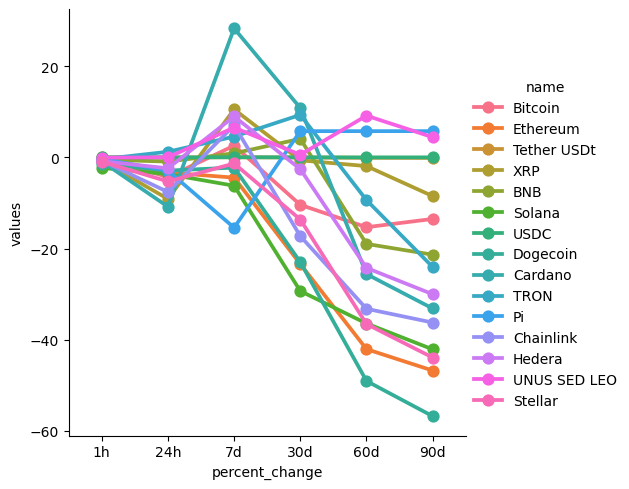

In [ ]:
sns.catplot(x = 'percent_change', y = 'values', hue = 'name', data = df7, kind='point')

In [ ]:
df8 =df[['name', 'quote.USD.price', 'timestamp']]
df8 = df8.query("name =='Bitcoin'")
df8 

,name,quote.USD.price,timestamp
0,Bitcoin,86502.54986,2025-03-07 17:44:45.527669


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

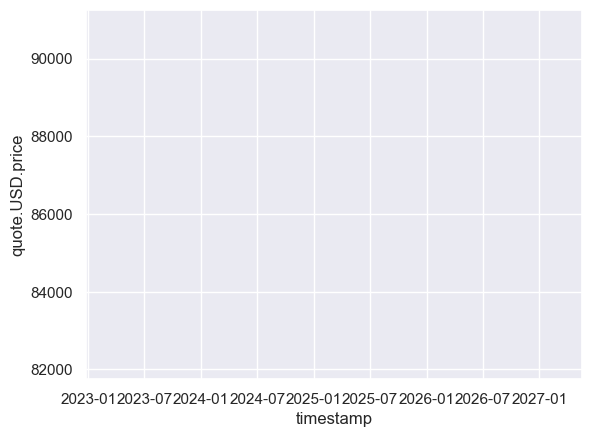

In [ ]:
sns.set_theme(style = "darkgrid")
sns.lineplot(x='timestamp', y = 'quote.USD.price', data = df8)